In [1]:
### Data is from UCI repo

In [2]:
### Here we detect the outliers which are the fraud customers

In [3]:
## We need to compute the MID(Mean Inter-Neuron Distance), which is the mean euclidean distance of the main neuron with its neighbourhood

In [4]:
### Outliers will be far from the mean

In [5]:
### Class 1 are the customers whose applications got approved
### They may be fraudulent

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import *

In [15]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [16]:
dataset.shape

(690, 16)

In [17]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [18]:
### x and y are the dimensions of the SOM(it should not be small so that outliers can be detected)
### input_len are the number of features of X(customer id included to find the id of faulters)
### sigma is the radius

In [19]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.3)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [20]:
### The higher the MID the more away will be the winning node from its neighbourhood
### thus it will be more likely to be an outlier
### The BMU far from its neighbourhood is generally far from the clusters

In [21]:
### colors closer to white are outliers

In [22]:
### the window is the bone()
from pylab import bone, pcolor, colorbar

In [23]:
bone()

<Figure size 432x288 with 0 Axes>

In [24]:
distance_map = som.distance_map().round(1)

In [25]:
distance_map

array([[0.2, 0.4, 0.4, 0.4, 0.5, 0.6, 0.5, 0.3, 0.3, 0.2],
       [0.5, 0.7, 0.7, 0.7, 0.8, 0.9, 0.8, 0.6, 0.6, 0.5],
       [0.5, 0.6, 0.6, 0.6, 1. , 0.8, 0.7, 0.7, 0.7, 0.5],
       [0.4, 0.6, 0.6, 0.8, 0.6, 0.9, 0.8, 0.6, 0.5, 0.3],
       [0.5, 0.7, 0.7, 0.7, 0.8, 0.6, 0.7, 0.5, 0.4, 0.2],
       [0.6, 1. , 0.8, 0.8, 0.6, 0.7, 0.6, 0.4, 0.5, 0.4],
       [0.5, 0.8, 0.8, 0.8, 0.8, 0.7, 0.5, 0.4, 0.4, 0.3],
       [0.5, 0.9, 0.7, 0.7, 0.7, 0.7, 0.5, 0.4, 0.4, 0.3],
       [0.4, 0.7, 0.7, 0.7, 0.8, 0.6, 0.6, 0.5, 0.5, 0.3],
       [0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.3, 0.4, 0.3, 0.2]])

In [26]:
index = []
for i in range(10):
    for j in range(10):
        if(distance_map[i,j]>=0.5):
            index.append([i,j])
len(index)

69

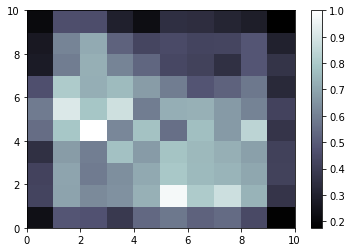

In [27]:
pcolor(som.distance_map().T)
colorbar() #gives legend

In [28]:
mappings = som.win_map(X)
mappings.keys()

dict_keys([(6, 4), (5, 1), (1, 6), (8, 4), (3, 8), (9, 0), (3, 3), (8, 0), (3, 5), (6, 6), (6, 7), (7, 8), (7, 7), (0, 8), (3, 1), (4, 0), (7, 6), (3, 6), (7, 3), (2, 4), (3, 2), (9, 9), (4, 4), (5, 9), (5, 0), (2, 0), (9, 1), (4, 8), (8, 5), (6, 1), (8, 1), (4, 6), (1, 9), (0, 2), (4, 7), (6, 3), (9, 5), (2, 3), (7, 1), (0, 6), (8, 3), (9, 3), (2, 2), (7, 2), (8, 2), (6, 5), (8, 8), (0, 7), (6, 9), (9, 2), (5, 5), (5, 2), (7, 0), (1, 7), (3, 7)])

In [29]:
fraud_list = []
sum = 0
for x in index:
    fraud_list.append(mappings[(x[0],x[1])])
    sum = sum + len(mappings[(x[0],x[1])])
sum

469

In [30]:
frauds = []
for x in fraud_list:
    for y in x:
        frauds.append(y)
            

In [31]:
fraud_array = np.asarray(frauds)

In [32]:
fraud_inverse_transformed = sc.inverse_transform(frauds) # Undo the scaling of data pattern of frauds according to feature_range

## Printing fraud ID's

In [33]:
count = 0
fraud_id_list = []
for x in fraud_inverse_transformed:
    fraud_id_list.append(x[0])
print('Total frauds :{}'.format(len(fraud_id_list)))

Total frauds :469


In [34]:
count = 0
right_prediction_index =[]
wrong_prediction_index =[]
for x in fraud_id_list:
    for i,y in enumerate(dataset['CustomerID']):
        if(x == y):
            if(dataset['Class'][i] == 0):
                count = count+1
                right_prediction_index.append(i)
            else:
                wrong_prediction_index.append(i)
                

In [35]:
a = len(right_prediction_index)
a

313

In [36]:
b=len(wrong_prediction_index)
b

156

In [37]:
l = len(fraud_id_list)

In [38]:
print('Right Prediction:{}'.format((a/l)*100))

Right Prediction:66.73773987206823


In [56]:
total_population = dataset.shape[0]

In [39]:
total_actual_frauds  = dataset[dataset['Class'] == 0].shape[0]

In [60]:
print('Percentage of frauds detected out of total actual frauds:{}'.format((a/total_actual_frauds)*100))

Percentage of frauds detected out of total actual frauds:81.72323759791122


In [64]:
print('Percentage of fraud customers in population as claimed by prediction model:{}'.format((a/total_population)*100))

Percentage of fraud customers in population as claimed by prediction model:45.36231884057971


In [62]:
print('Actual precentage of frauds out of total population:{}'.format((total_actual_frauds/total_population)*100))

Actual precentage of frauds out of total population:55.507246376811594


In [61]:
print('Affected population(percentage of custormers who were not fraud but were predicted as fraud)):{}'.format((b/690)*100))

Affected population(percentage of custormers who were not fraud but were predicted as fraud)):22.608695652173914
